1.  Find the salary for the experience of 4.2 years and 5.2 years from the given dataset (salary_data) using simple linear regression. Train the model up to 10 iteration. And plot graph for error rate.

In [140]:
import pandas as pd
import random as r
import numpy as np
import matplotlib.pyplot as plt

In [108]:
data=pd.read_csv('Salary_Data.csv')

In [109]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [110]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [111]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 544.0 bytes


In [113]:
m=[]
c=[]

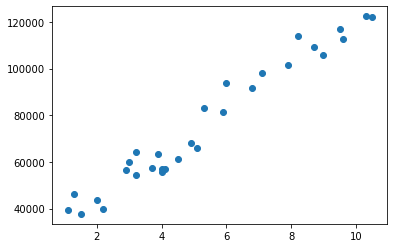

In [114]:
y=np.array(data['Salary'])
x=np.array(data['YearsExperience'])
plt.scatter(x,y)
plt.show()

In [115]:
import math
intial_m=1.0
intial_c=1.0
rmse=[]

In [116]:
def error(c_val,m_val):
    s=0
    for j,k in zip(x,y):
        s=s+((k-(m_val*j+c_val))**2)
    c.append(c_val)
    m.append(m_val)
    r=math.sqrt(s/len(x))
    rmse.append(r)

In [117]:
error(intial_c,intial_m)
c_val=intial_c
m_val=intial_m
c_gradient=0.0
m_gradient=0.0
n=float(len(x))
learningRate=0.0001

In [118]:
for j in range(400):
    cg=[]
    mg=[]
    for i in range(0,len(x)):
        cg.append(((m_val * x[i]) + c_val)-y[i])
        mg.append(x[i] * (((m_val * x) + c_val)-y[i]))
    c_gradient=np.array(cg).sum()/n
    m_gradient=np.array(mg).sum()/n      
    c_val = c_val - (learningRate * c_gradient)
    m_val = m_val - (learningRate * m_gradient)
    error(c_val,m_val)

In [119]:
min_val=rmse.index(min(rmse))

In [120]:
m_val=m[min_val]
c_val=c[min_val]
m_val,c_val

(13147.313709762298, 59.93521298470703)

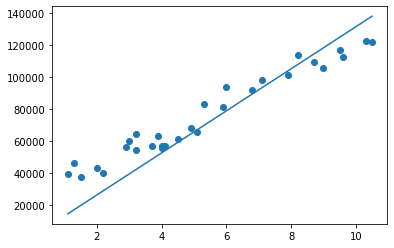

In [121]:
plt.scatter(x,y)
e=np.array(rmse)
p=[]
for i in range(0,len(x)):
    p.append(m[min_val]*x[i]+c[min_val])
plt.plot(x,p)

salary for experience of 4.2 years

In [122]:
m_val*4.2+c_val

55278.652793986366

salary for experience of 5.2 years

In [123]:
m_val*5.2+c_val

68425.96650374867

### error rate graph

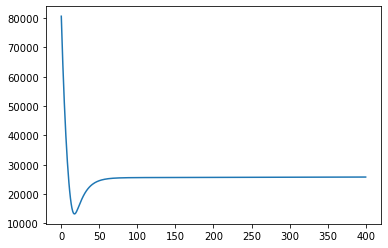

In [124]:
plt.plot(rmse)

2.  Find perfect model to predict brain weight from given dataset (datasets_56097_107686_headbrain). Train the model up to 15 iterations and visualize your results.

In [159]:
data2=pd.read_csv('headbrain.csv')

In [160]:
data2

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [161]:
data2.insert(0,'w0',1)
data2

,w0,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,1,4512,1530
1,1,1,1,3738,1297
2,1,1,1,4261,1335
3,1,1,1,3777,1282
4,1,1,1,4177,1590
...,...,...,...,...,...
232,1,2,2,3214,1110
233,1,2,2,3394,1215
234,1,2,2,3233,1104
235,1,2,2,3352,1170


In [165]:
x=np.array(data2.iloc[:,:4])
y=np.array(data2.iloc[:,4])
import math
intial_m=1.0
intial_c=1.0
rmse=[]

In [173]:
m1=np.dot(x.T,x)
m2=np.dot(x.T,y)
m1=np.linalg.inv(m1)
w=np.dot(m1,m2)

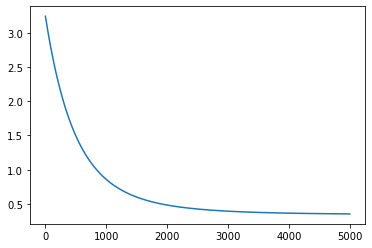

In [183]:
er=[]
w_1=[]
w_2=[]
w_3=[]
w_0=[]
te=[]
def compute_error(W0, W1, W2, W3, x1, x2, x3, y1):
    totalError = 0
    x1 = x1
    x2 = x2
    x3 = x3
    y1 = y1
    #print(c,m)
    w_1.append(W1)
    w_2.append(W2)
    w_3.append(W3)
    w_0.append(W0)
    for i in range(0,len(x1)):
        totalError+=(((W0+W1*x1[i]+W2*x2[i]+W3*x3[i])-y1[i]) ** 2)
      #te.append(totalError)
    #print(te)
    #err=(np.array(te).sum())
    er.append(totalError/len(x1))
    #print(er)

def step_gradient(w0_current, w1_current, w2_current, w3_current, x1, x2, x3, y1, learningRate):
    w0_gradient = 0.0
    w1_gradient = 0.0
    w2_gradient = 0.0
    w3_gradient = 0.0
    N = float(len(x1))
    x1 = x1
    x2 = x2
    x3 = x3
    y1 = y1
    wg0=[]
    wg1=[]
    wg2=[]
    wg3=[]
    for i in range(0,len(x1)):
        wg0.append((w0_current+w1_current*x1[i]+w2_current*x2[i]+w3_current*x3[i])-y1[i])
        wg1.append(x1[i] * ((w0_current+w1_current*x1[i]+w2_current*x2[i]+w3_current*x3[i])-y1[i]))
        wg2.append(x2[i] * ((w0_current+w1_current*x1[i]+w2_current*x2[i]+w3_current*x3[i])-y1[i]))
        wg3.append(x3[i] * ((w0_current+w1_current*x1[i]+w2_current*x2[i]+w3_current*x3[i])-y1[i]))
    w0_gradient=(np.array(wg0).sum())/N
    w1_gradient=(np.array(wg1).sum())/N
    w2_gradient=(np.array(wg2).sum())/N
    w3_gradient=(np.array(wg3).sum())/N
    new_w0 = w0_current - (learningRate * w0_gradient)
    new_w1 = w1_current - (learningRate * w1_gradient)
    new_w2 = w2_current - (learningRate * w2_gradient)
    new_w3 = w3_current - (learningRate * w3_gradient)
    compute_error(new_w0,new_w1,new_w2,new_w3,x1,x2,x3,y1)
    return [new_w0,new_w1,new_w2,new_w3]

def gradient_descent_runner(x1, x2, x3, y1, starting_w0, starting_w1, starting_w2,starting_w3, learning_rate, num_iterations):
    w0 = starting_w0
    w1 = starting_w1
    w2 = starting_w2
    w3 = starting_w3
    for i in range(num_iterations):
        w0, w1, w2, w3 = step_gradient(w0, w1, w2, w3, x1, x2, x3, y1, learning_rate)
        
def run():
    data = pd.read_csv('headbrain.csv')
    z=[]
    for x in data.columns:
        z.append(x)
    data=data[z].apply(lambda rec:(rec - rec.mean())/rec.std(), axis=0)
    sn = data
    x11=sn.iloc[:,0:1]
    x22=sn.iloc[:,1:2]
    x33=sn.iloc[:,2:3]
    y11=sn.iloc[:,3:4]
    x1=np.array(x11)
    x2=np.array(x22)
    x3=np.array(x33)
    y1=np.array(y11)
    learning_rate = 0.001
    initial_w0 = 1 
    initial_w1 = 1 
    initial_w2 = 1
    initial_w3 = 1
    num_iterations = 5000
    compute_error(initial_w0, initial_w1, initial_w2, initial_w3, x1, x2, x3, y1)
    gradient_descent_runner(x1, x2, x3, y1, initial_w0, initial_w1, initial_w2,initial_w3, learning_rate, num_iterations)
    


run()
it=np.arange(0,5001)
#print(er)
plt.plot(it,er)


3.  Recall the heart dataset from canvas and built a logistic regression model for predicting heart attach based on the given features.(age ,sex, cp, trestbps, chol, fbs, restesg ,thalach ,exang, oldpeak, slope, ca , thal,)
<br>Age 55
<br>Sex 1 
<br>Cp 2<br>
Trestbps 144
<br>Chol1Fbs 1 
<br>thalach 145
<br>Restesg 1
<br>Exang 1
<br>Oldpeak 2.4
<br>Slope 2
<br>Ca 0
<br>thal 1
<br>target

In [177]:
w_values=[]
error_rate=[]

def Linear(w):
    data=pd.read_csv("heart.csv")
    data_x=data.iloc[:,0:13]
    data_y=data.iloc[:,13]
    data_x=data_x.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
    data_x.insert(0,"w0",1)
    x=np.array(data_x)
    y=np.array(data_y)
    y_predict=[]
    for i in range(0,303):
        c=0
        for j in range(0,len(w)):
          c+=w[j]*x[i][j]
        y_predict.append(c)
        w_values.append(w)
  
    y_f_x=[]
    for i in range(0,303):
        den=(1+math.exp(-y_predict[i]))
        val=1/den
        y_f_x.append(round(val,2))
    j_theta=[]
    for i in range(0,303):
        if (y_f_x[i]!=0):
            j_theta.append((y[i]*np.log2(y_f_x[i]))+(1-y[i])*(1-np.log2(y_f_x[i])))
        else:
            j_theta.append(0)
  
    j_t_sum=np.array(j_theta).mean()
  # print(round(j_t_sum,3))
    error_rate.append(j_t_sum)
    y_grad=[]
    for j in range(0,14):
        x_g=0
        for i in range(0,303):
            x_g+=(x[i][j]*(y[i]-y_f_x[i]))
        y_grad.append(x_g)
    new_y=[]
    for j in range(0,14):
        new_y.append(round(w[j]-(0.1)*(1/303)*y_grad[j],4))
  
    return new_y

w=[1,1,1,1,1,1,1,1,1,1,1,1,1,1]
for i in range(100):
    w=Linear(w)

print(error_rate)
z=np.array(error_rate).min()
index=error_rate.index(z)
print(w_values[index])
print(index)

[-0.03163618264464116, -0.061763879723328294, -0.08952065639311396, -0.13046411531996674, -0.1481399989106705, -0.1470082222527363, -0.13237936128812128, -0.17257451302515175, -0.14476360269024785, -0.13083156262119153, -0.11289809211231615, -0.13146778226538933, -0.13516344509539996, -0.1558107485659836, -0.12417988555226848, -0.12201072632020356, -0.04418475796852986, -0.023953034101203186, -0.024918928256422286, 0.011152606948088803, 0.029526272752718515, 0.03085479296093109, 0.0664927930887759, 0.08473226946588937, 0.07510818397456155, 0.05560550653337489, 0.03426898916430698, 0.06284753053389669, 0.08613888650289965, 0.09472893854800875, 0.10980694591332826, 0.11345586252810087, 0.12102116270520094, 0.14815151154004116, 0.19447159686033988, 0.18076807757448782, 0.18495401297410874, 0.14491193961193272, 0.1250451686640133, 0.1244435481425696, 0.11047642004453151, 0.09683021391078364, 0.07933588980101805, 0.0883134768411452, 0.09904987183447476, 0.12462834922703726, 0.13063506699272

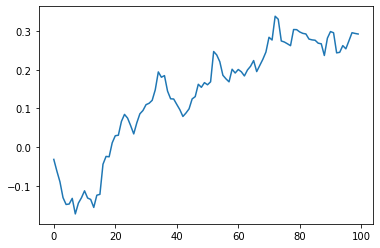

In [178]:
iter=np.arange(100)
plt.plot(iter,error_rate)